In [41]:
### plt 한글 폰트 불러오기

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = '/Users/JAE111/Library/Fonts/NanumBarunpenR.ttf'  #font 경로 설정
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [61]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

### 지역별 고령비율 (2022년)

In [5]:
test = pd.read_csv("elderly_people_by_loc.csv",encoding='cp949')

In [11]:
test.head(2)

,행정구역별(1),2021.11,2021.11.1,2021.11.2,2021.12,2021.12.1,2021.12.2,2022.01,2022.01.1,2022.01.2,2022.02,2022.02.1,2022.02.2,2022.03,2022.03.1,2022.03.2
0,행정구역별(1),고령인구비율<br>(A÷B×100) (%),65세이상인구<br>(A) (명),전체인구<br>(B) (명),고령인구비율<br>(A÷B×100) (%),65세이상인구<br>(A) (명),전체인구<br>(B) (명),고령인구비율<br>(A÷B×100) (%),65세이상인구<br>(A) (명),전체인구<br>(B) (명),고령인구비율<br>(A÷B×100) (%),65세이상인구<br>(A) (명),전체인구<br>(B) (명),고령인구비율<br>(A÷B×100) (%),65세이상인구<br>(A) (명),전체인구<br>(B) (명)
1,전국,17.1,8821070,51652704,17.1,8851033,51638809,17.2,8900662,51632473,17.3,8943147,51625561,17.4,8983296,51610695


In [13]:
test1 = test.drop(index=[0])

In [59]:
## 고령비율은 달 별로 크게 달라지는 게 없을 거 같아서 그냥 최근걸로 선택 (2022년 3월) --> 2022년 자료 찾기
test2 = test1[['행정구역별(1)','2022.03']]
test2.columns = ['region', 'rate']
test3 = test2.sort_values('rate')
test3

,region,rate
9,세종특별자치시,10.2
8,울산광역시,14.0
10,경기도,14.1
5,인천광역시,15.0
6,광주광역시,15.0
7,대전광역시,15.5
18,제주특별자치도,16.5
2,서울특별시,17.0
1,전국,17.4
4,대구광역시,17.8


<BarContainer object of 18 artists>

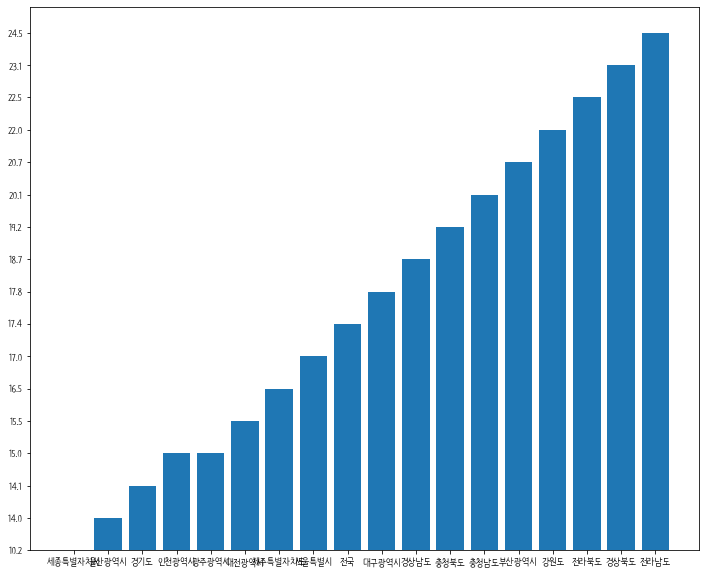

In [60]:
plt.figure(figsize=(12,10))
plt.bar(test3['region'],test3['rate'])

전라도, 경상도, 강원도 주요 고려

### 코로나 관련 (누적)데이터셋

**1. 코로나19감염증으로 인한 성별,연령별 확진자,사망자,치명률등**

In [69]:
gen_age = pd.read_csv('current/Covid19GenAgeCaseInf_202204261813.csv')
gen_age.head(10)

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
0,1,남성,3905,39.90,82.0,50.62,2.10,2020-04-02 19:02:48.48,NaN
1,2,여성,5881,60.10,80.0,49.38,1.36,2020-04-02 19:02:48.48,NaN
2,3,80 이상,442,4.52,82.0,50.62,18.55,2020-04-02 19:02:48.48,NaN
3,4,70-79,651,6.65,46.0,28.40,7.07,2020-04-02 19:02:48.48,NaN
4,5,60-69,1235,12.62,22.0,13.58,1.78,2020-04-02 19:02:48.48,NaN
5,6,50-59,1851,18.91,10.0,6.17,0.54,2020-04-02 19:02:48.48,NaN
6,7,40-49,1312,13.41,1.0,0.62,0.08,2020-04-02 19:02:48.48,NaN
7,8,30-39,1012,10.34,1.0,0.62,0.10,2020-04-02 19:02:48.48,NaN
8,9,20-29,2656,27.14,NaN,NaN,NaN,2020-04-02 19:02:48.48,NaN
9,10,10-19,515,5.26,NaN,NaN,NaN,2020-04-02 19:02:48.48,NaN


![poster](./gen_age.png)

In [ ]:
# 시간이 없어서 데이터 가공 및 시각화는 못하겠는데 이 자료로 60대 이상 고령층의 사망률 및 치명률을 확인하면 좋을 것 같습니다. 

**2. 일별 확진자,완치자,지료중인환자,사망자등**

In [65]:
daily = pd.read_csv('current/Covid19InfState_202204261814.csv')
daily.head()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,1,20200101,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.33,2020-02-03 12:21:56.56
1,2,20200202,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.49,NaN
2,3,20200203,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.17,2020-02-04 14:19:46.46
3,4,20200204,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.59,NaN
4,5,20200205,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.31,2020-02-05 9:43:16.16


![poster](./daily.png)

In [ ]:
# 딱히 이 데이터셋이 필요할 것 같지 않지만 굳이 쓴다면 치료중인 환자 수 및 사망자 수의 시간별 흐름?추세?를 분석하면 좋을 듯 합니다.

**3. 코로나19감염증으로 인한 시.도별 신규확진자,신규사망자,격리중인환자수,격리해제환자수등**

In [66]:
sido = pd.read_csv('current/Covid19SidoInfState_202204261814.csv')
sido.head()

,seq,stdDay,gubun,gubunCn,gubunEn,deathCnt,incDec,isolClearCnt,qurRate,defCnt,isolIngCnt,overFlowCnt,localOccCnt,createDt,updateDt
0,1,2020년 3월 1일 16시,합계,NaN,NaN,18.0,586.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
1,2,2020년 3월 1일 16시,서울,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
2,3,2020년 3월 1일 16시,부산,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
3,4,2020년 3월 1일 16시,대구,NaN,NaN,9.0,469.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
4,5,2020년 3월 1일 16시,인천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN


![poster](./sido.png)

In [ ]:
# 지역별 (시도별) 사망자 수를 시계열로 분석하면 좋을 듯 합니다. (이것도 시간이 없어서 가공 및 시각화는 못했습니다.. 죄송합니닷 ㅠㅠ)

### 감염병/중환자 시설 현황

In [76]:
row_fac = pd.read_csv("pandemic_critical_facility.csv", encoding='cp949')
row_fac

,요양기관명,시도명,시군구명,요양기관종별,표시과목,주소,중환자실 병상수 소계,성인중환자실 병상수,소아중환자실 병상수,신생아 중환자실 병상수,격리병실 병상수
0,"""사""대한산업보건협회부설경북의원",경상북도,경산시,의원,일반의,경상북도 경산시 진량읍 공단1로 28,0,0,0,0,0
1,(VOM)봄안과의원,대구광역시,동구,의원,안과,"대구광역시 동구 안심로 58, 3층 (율하동, 율하메디빌)",0,0,0,0,0
2,(공동체의료소비자생활협동조합)비타민의원,광주광역시,서구,의원,일반의,"광주광역시 서구 대남대로 441, 지하1~지상4층 (농성동)",0,0,0,0,0
3,(복지)예사랑병원,부산광역시,서구,정신병원,해당사항없음,부산광역시 서구 옥천로130번길 38 (아미동2가),0,0,0,0,0
4,(사) 경찰공제회 포항의원,경상북도,포항시 남구,의원,일반의,경상북도 포항시 남구 오천읍 냉천로 656,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
40467,힘찬우리의원,전라남도,목포시,의원,일반의,"전라남도 목포시 포미로 16 (용해동, 이노티)",0,0,0,0,0
40468,힘튼의원,서울특별시,은평구,의원,일반의,"서울특별시 은평구 은평로 170, 305호 (응암동, 상현빌딩)",0,0,0,0,0
40469,힘플러스병원,전라남도,순천시,병원,일반의,전라남도 순천시 신월큰길 13 (조례동),0,0,0,0,0
40470,힙스청담의원,경기도,성남시 분당구,의원,일반의,"경기도 성남시 분당구 성남대로331번길 3-3, 젤존타워III 8층 805호 (정자동)",0,0,0,0,0


In [78]:
# 시설이 있는 병원들만 추출
facility = row_fac[row_fac.iloc[:,6:11].sum(axis=1) != 0]
facility = facility.reset_index()
facility

,index,요양기관명,시도명,시군구명,요양기관종별,표시과목,주소,중환자실 병상수 소계,성인중환자실 병상수,소아중환자실 병상수,신생아 중환자실 병상수,격리병실 병상수
0,47,(의)나사렛의료재단 나사렛국제병원,인천광역시,연수구,종합병원,해당사항없음,"인천광역시 연수구 먼우금로 98- (동춘동, (동춘동))",17,17,0,0,3
1,71,(의)영문의료재단 다보스병원,경기도,용인시 처인구,종합병원,해당사항없음,"경기도 용인시 처인구 백옥대로1082번길 18, 다보스종합병원 (김량장동)",8,8,0,0,0
2,349,KS병원,광주광역시,광산구,종합병원,해당사항없음,광주광역시 광산구 왕버들로 220 (수완동),10,10,0,0,0
3,520,가은병원,경기도,부천시,요양병원,해당사항없음,"경기도 부천시 마니로24번길 43-17 (송내동, 가은병원A동)",0,0,0,0,1
4,574,가톨릭관동대학교 국제성모병원,인천광역시,서구,종합병원,해당사항없음,"인천광역시 서구 심곡로100번길 25-0 (심곡동,인천국제성모병원)",46,46,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
611,40283,효자병원,경기도,용인시 기흥구,요양병원,해당사항없음,경기도 용인시 기흥구 중부대로874번길 1-30 (상하동),0,0,0,0,4
612,40292,효정요양병원,광주광역시,광산구,요양병원,해당사항없음,광주광역시 광산구 노안삼도로 1263 (삼거동),0,0,0,0,1
613,40398,흥해아동병원,경상북도,포항시 북구,병원,일반의,"경상북도 포항시 북구 흥해읍 한동로45번길 30-8, 3~5층",0,0,0,0,5
614,40423,희명병원,서울특별시,금천구,종합병원,해당사항없음,서울특별시 금천구 시흥대로 244 (시흥동),27,27,0,0,0


In [87]:
sido_ = facility['시도명'].unique()
sido_

array(['인천광역시', '경기도', '광주광역시', '서울특별시', '강원도', '부산광역시', '경상남도', '충청북도',
       '대구광역시', '경상북도', '전라남도', '대전광역시', '전라북도', '충청남도', '울산광역시',
       '세종특별자치시', '제주특별자치도'], dtype=object)

In [84]:
## 지역별로 데이터프레임을 나눠준다
for i in sido_:
    globals()['var_'+str(i)] = facility[facility['시도명'] == i]

In [90]:
## 아까 고령자 top3의 의료시설 현황

var_전라북도.head()

,index,요양기관명,시도명,시군구명,요양기관종별,표시과목,주소,중환자실 병상수 소계,성인중환자실 병상수,소아중환자실 병상수,신생아 중환자실 병상수,격리병실 병상수
96,4832,김제병원,전라북도,김제시,병원,일반의,"전라북도 김제시 중앙로 55 (서암동, (서암동))",0,0,0,0,21
99,5484,나은요양병원,전라북도,전주시 덕진구,요양병원,해당사항없음,전라북도 전주시 덕진구 기린대로 951-0 (여의동),0,0,0,0,5
121,7329,대자인병원,전라북도,전주시 덕진구,종합병원,해당사항없음,"전라북도 전주시 덕진구 견훤로 390 (우아동3가,(우아동3가))",31,31,0,0,0
129,7680,더숲요양병원,전라북도,전주시 완산구,요양병원,해당사항없음,"전라북도 전주시 완산구 흑석2길 22 (서서학동, (서서학동))",0,0,0,0,4
150,11070,미래요양병원,전라북도,김제시,요양병원,해당사항없음,전라북도 김제시 금구면 낙산1길 72,0,0,0,0,7


In [93]:
var_전라북도.info() # 의료시설 36개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 96 to 607
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         36 non-null     int64 
 1   요양기관명         36 non-null     object
 2   시도명           36 non-null     object
 3   시군구명          36 non-null     object
 4   요양기관종별        36 non-null     object
 5   표시과목          36 non-null     object
 6   주소            36 non-null     object
 7   중환자실 병상수 소계   36 non-null     int64 
 8   성인중환자실 병상수    36 non-null     int64 
 9   소아중환자실 병상수    36 non-null     int64 
 10  신생아 중환자실 병상수  36 non-null     int64 
 11  격리병실 병상수      36 non-null     int64 
dtypes: int64(6), object(6)
memory usage: 3.7+ KB


In [91]:
var_전라남도.head()

,index,요양기관명,시도명,시군구명,요양기관종별,표시과목,주소,중환자실 병상수 소계,성인중환자실 병상수,소아중환자실 병상수,신생아 중환자실 병상수,격리병실 병상수
54,2632,광양사랑병원,전라남도,광양시,종합병원,해당사항없음,"전라남도 광양시 공영로 71 (중동, (중동))",10,10,0,0,0
70,2974,국군함평병원,전라남도,함평군,병원,일반의,전라남도 함평군 해보면 신해로 1027,0,0,0,0,3
74,2982,국립목포병원,전라남도,목포시,병원,일반의,"전라남도 목포시 신지마을1길 75 (석현동,(석현동))",0,0,0,0,50
88,3482,근로복지공단 순천병원,전라남도,순천시,종합병원,해당사항없음,"전라남도 순천시 조례1길 24 (조례동, (조례동))",5,5,0,0,1
104,5940,노블요양병원,전라남도,나주시,요양병원,해당사항없음,전라남도 나주시 남평읍 세남로 1566-3,0,0,0,0,1


In [92]:
var_전라남도.info() # 의료시설 38개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 54 to 602
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         38 non-null     int64 
 1   요양기관명         38 non-null     object
 2   시도명           38 non-null     object
 3   시군구명          38 non-null     object
 4   요양기관종별        38 non-null     object
 5   표시과목          38 non-null     object
 6   주소            38 non-null     object
 7   중환자실 병상수 소계   38 non-null     int64 
 8   성인중환자실 병상수    38 non-null     int64 
 9   소아중환자실 병상수    38 non-null     int64 
 10  신생아 중환자실 병상수  38 non-null     int64 
 11  격리병실 병상수      38 non-null     int64 
dtypes: int64(6), object(6)
memory usage: 3.9+ KB


In [89]:
var_경상북도.head()

,index,요양기관명,시도명,시군구명,요양기관종별,표시과목,주소,중환자실 병상수 소계,성인중환자실 병상수,소아중환자실 병상수,신생아 중환자실 병상수,격리병실 병상수
39,1669,경상북도김천의료원,경상북도,김천시,종합병원,해당사항없음,경상북도 김천시 모암길 24 (모암동),15,15,0,0,7
40,1672,경상북도립안동노인전문요양병원,경상북도,안동시,요양병원,해당사항없음,경상북도 안동시 남후면 남일로 1463,0,0,0,0,1
41,1673,경상북도안동의료원,경상북도,안동시,종합병원,해당사항없음,경상북도 안동시 태사2길 55 (북문동),10,10,0,0,15
42,1675,경상북도포항의료원,경상북도,포항시 북구,종합병원,해당사항없음,"경상북도 포항시 북구 용흥로 36 (용흥동, (용흥동))",10,10,0,0,7
61,2864,구미강동병원,경상북도,구미시,종합병원,해당사항없음,경상북도 구미시 인동20길 46 (진평동),12,12,0,0,0


In [94]:
var_경상북도.info() ## 의료시설 45개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 39 to 613
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         45 non-null     int64 
 1   요양기관명         45 non-null     object
 2   시도명           45 non-null     object
 3   시군구명          45 non-null     object
 4   요양기관종별        45 non-null     object
 5   표시과목          45 non-null     object
 6   주소            45 non-null     object
 7   중환자실 병상수 소계   45 non-null     int64 
 8   성인중환자실 병상수    45 non-null     int64 
 9   소아중환자실 병상수    45 non-null     int64 
 10  신생아 중환자실 병상수  45 non-null     int64 
 11  격리병실 병상수      45 non-null     int64 
dtypes: int64(6), object(6)
memory usage: 4.6+ KB


In [95]:
# 그럼 의료시설 많을 것 같은 서울은 ??
var_서울특별시.info() # 의료시설 83개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 6 to 614
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         83 non-null     int64 
 1   요양기관명         83 non-null     object
 2   시도명           83 non-null     object
 3   시군구명          83 non-null     object
 4   요양기관종별        83 non-null     object
 5   표시과목          83 non-null     object
 6   주소            83 non-null     object
 7   중환자실 병상수 소계   83 non-null     int64 
 8   성인중환자실 병상수    83 non-null     int64 
 9   소아중환자실 병상수    83 non-null     int64 
 10  신생아 중환자실 병상수  83 non-null     int64 
 11  격리병실 병상수      83 non-null     int64 
dtypes: int64(6), object(6)
memory usage: 8.4+ KB
